In [83]:
import pandas as pd
from surprise import Dataset, Reader, SVD, accuracy
import os
from surprise.model_selection import cross_validate
import numpy as np
#from sklearn.decomposition import SVD
from surprise.model_selection import train_test_split
import matplotlib.pyplot as plt

In [2]:
movies_df = pd.read_csv('movies_clean.csv')
ratings_df = pd.read_csv('ratings_clean.csv')

In [3]:
movies_df.head()

,Unnamed: 0,movieId,title,genres,year
0,0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995.0
1,1,2,Jumanji (1995),Adventure|Children|Fantasy,1995.0
2,2,3,Grumpier Old Men (1995),Comedy|Romance,1995.0
3,3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,1995.0
4,4,5,Father of the Bride Part II (1995),Comedy,1995.0


In [4]:
ratings_df.head()

,Unnamed: 0,userId,movieId,rating,timestamp
0,0,1,1,4.0,964982703
1,1,1,3,4.0,964981247
2,2,1,6,4.0,964982224
3,3,1,47,5.0,964983815
4,4,1,50,5.0,964982931


In [7]:
#data = Dataset.load_builtin('movies_clean.csv')

In [61]:
df = pd.read_csv('ratings_clean.csv', index_col=0).to_csv('ratings_no_inde.csv', index=False)
df = pd.read_csv('ratings_no_inde.csv')

In [62]:
df.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [30]:
file_path = os.path.expanduser('ratings_no_inde.csv')

In [33]:
reader = Reader(line_format="user item rating timestamp", sep=",", skip_lines =1)

In [35]:
reader

In [36]:
data = Dataset.load_from_file(file_path, reader=reader)

In [67]:
train_ratings, test_ratings = train_test_split(data, test_size=.20, random_state = 42)
print("Size of trainset: ", train_ratings.n_ratings)
print("Size of testset: ", len(test_ratings))

Size of trainset:  65855
Size of testset:  16464


In [51]:
np.average(results["test_mae"])

0.6897714938688422

In [52]:
np.average(results["test_rmse"])

0.8986278494797377

## User based similarity

from surprise import KNNBasic
knn_model = KNNBasic(random_state = 42,verbose = False)
knn_model.fit(train_ratings)

In [80]:
sim_options = {'name': 'cosine',
               'user_based': True  
               }
algo = KNNBasic(sim_options=sim_options)

cr_val = cross_validate(algo, data, measures=['RMSE', 'MAE'], cv=5, verbose=True)
cr_val

Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Evaluating RMSE, MAE of algorithm KNNBasic on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    1.0035  1.0047  1.0167  1.0153  0.9989  1.0078  0.0069  
MAE (testset)     0.7732  0.7706  0.7818  0.7754  0.7675  0.7737  0.0049  
Fit time          0.17    0.18    0.18    0.18    0.18    0.18    0.00    
Test time         1.76    1.69    1.51    1.77    1.64    1.67    0.10    


{'test_rmse': array([1.0034951 , 1.00474392, 1.01667479, 1.01528429, 0.99893399]),
 'test_mae': array([0.77320192, 0.77060641, 0.78182256, 0.77542747, 0.76745577]),
 'fit_time': (0.17290496826171875,
  0.181077241897583,
  0.17697477340698242,
  0.17619013786315918,
  0.18294501304626465),
 'test_time': (1.7574560642242432,
  1.6860322952270508,
  1.5055480003356934,
  1.7675871849060059,
  1.639082908630371)}

In [92]:
new = pd.DataFrame.from_dict(cr_val)
new.head()

,test_rmse,test_mae,fit_time,test_time
0,1.003495,0.773202,0.172905,1.757456
1,1.004744,0.770606,0.181077,1.686032
2,1.016675,0.781823,0.176975,1.505548
3,1.015284,0.775427,0.176190,1.767587
4,0.998934,0.767456,0.182945,1.639083


fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.line(new['test_rmse'], new['test_mae'], new['fit_time'], new['test_time'])

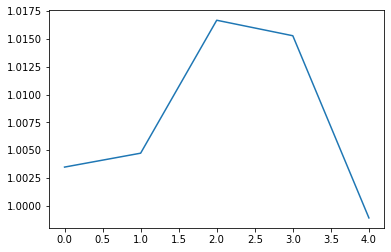

In [95]:
plt.plot(new['test_rmse'])

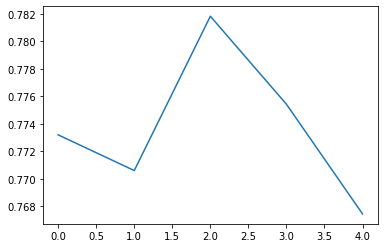

In [96]:
plt.plot(new['test_mae'])

In [78]:
sim_options = {'name': 'pearson',
               'user_based': True  
               }
algo = KNNBasic(sim_options=sim_options)

cross_validate(algo, data, measures=['RMSE', 'MAE'], cv=5, verbose=True)

Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Evaluating RMSE, MAE of algorithm KNNBasic on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    1.0046  1.0185  1.0046  1.0130  1.0185  1.0118  0.0062  
MAE (testset)     0.7719  0.7881  0.7721  0.7797  0.7855  0.7794  0.0067  
Fit time          0.21    0.22    0.25    0.23    0.24    0.23    0.02    
Test time         1.56    1.64    1.53    1.55    1.70    1.60    0.06    


{'test_rmse': array([1.00463571, 1.01847579, 1.00463393, 1.01296   , 1.01845034]),
 'test_mae': array([0.77185137, 0.78811243, 0.77206324, 0.77965216, 0.78549429]),
 'fit_time': (0.20668911933898926,
  0.22296714782714844,
  0.25247693061828613,
  0.23342084884643555,
  0.23992180824279785),
 'test_time': (1.5629870891571045,
  1.6360218524932861,
  1.5289478302001953,
  1.5497770309448242,
  1.7012946605682373)}

## Item based similarity

In [77]:
sim_options = {'name': 'cosine',
               'user_based': False  
               }
algo = KNNBasic(sim_options=sim_options)

cross_validate(algo, data, measures=['RMSE', 'MAE'], cv=5, verbose=True)

Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Evaluating RMSE, MAE of algorithm KNNBasic on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.9913  0.9861  0.9860  0.9827  0.9804  0.9853  0.0037  
MAE (testset)     0.7708  0.7660  0.7653  0.7618  0.7606  0.7649  0.0036  
Fit time          3.15    3.34    3.39    3.16    3.43    3.29    0.12    
Test time         5.63    5.70    5.83    5.69    5.45    5.66    0.12    


{'test_rmse': array([0.99132756, 0.98607801, 0.98601454, 0.98270243, 0.98036882]),
 'test_mae': array([0.77079849, 0.76602862, 0.76534853, 0.76182232, 0.76062835]),
 'fit_time': (3.1450350284576416,
  3.3446028232574463,
  3.388740062713623,
  3.157905101776123,
  3.428683042526245),
 'test_time': (5.632667064666748,
  5.698276996612549,
  5.827308177947998,
  5.685655832290649,
  5.445511102676392)}

In [79]:
sim_options = {'name': 'pearson',
               'user_based': True  
               }
algo = KNNBasic(sim_options=sim_options)

cross_validate(algo, data, measures=['RMSE', 'MAE'], cv=5, verbose=True)

Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Evaluating RMSE, MAE of algorithm KNNBasic on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    1.0034  1.0193  1.0190  1.0139  1.0116  1.0134  0.0058  
MAE (testset)     0.7751  0.7841  0.7822  0.7803  0.7784  0.7800  0.0031  
Fit time          0.23    0.22    0.24    0.29    0.26    0.25    0.02    
Test time         1.55    1.47    1.67    1.76    1.79    1.65    0.12    


{'test_rmse': array([1.00341141, 1.01930182, 1.01895149, 1.01392506, 1.01155007]),
 'test_mae': array([0.77507089, 0.78411223, 0.78224986, 0.78034936, 0.77844993]),
 'fit_time': (0.23497891426086426,
  0.21521997451782227,
  0.24121594429016113,
  0.28705883026123047,
  0.26020121574401855),
 'test_time': (1.5539770126342773,
  1.4653348922729492,
  1.6694321632385254,
  1.7554678916931152,
  1.7878708839416504)}